## Dependencies

In [1]:
import numpy as np
import pandas as pd

from utils import *

## I/O - Initialization

In [4]:
# select the channels to be processed
#channel_list = ['F4', 'C3', 'Cz', 'Oz', 'Fp1', 'Fp2', 'FT7', 'F8', 'Fz', 'C4']
channel_list = ['Cz','CP3','CPz','P3']
csv_file = 'eeg_features.csv'
dataset = data_loader(path = csv_file)
reduced_dataset = channel_selection(dataset, channel_list)
all_features = reduced_dataset.columns[:len(reduced_dataset.columns) - 1]

In [5]:
# select the models to be trained
models = ['K-NN', 'SVM', 'DTC', 'RFC', 'Logistic Regression', 'NN', 'GBC']

data = data_preparation(dataset=reduced_dataset, feature_subset=all_features[:len(all_features) - 6])

## Training

In [6]:
model_accs = {}
for model in models:
    model_accs[model] = model_training(data, model, stats=True, cm=False)


==== Stats_dict for the SVM model ====
Training Accuracy:  1.0
Test Accuracy:  0.9289245982694685
Sensitivity (Recall): 0.9465838509316771
Precision: 0.9136690647482014
F1_score: 0.9298352654057351
AUC: 0.9290114826614104
Logloss: 2.5618171444675357



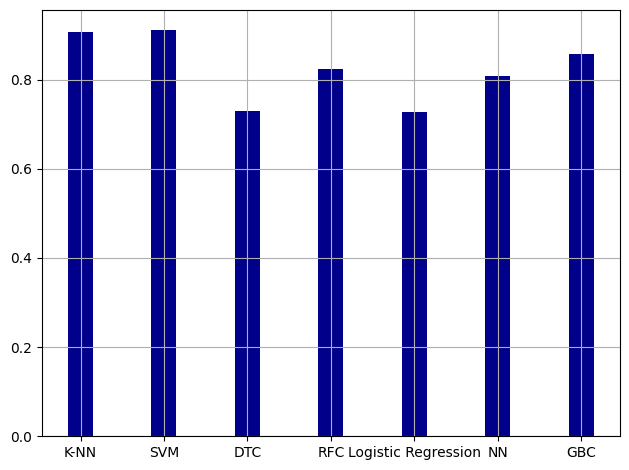

In [ ]:
import matplotlib.pyplot as plt
#for key in model_accs:
#    x = np.linspace(1,len(model_accs[key]), len(model_accs[key]))
#    plt.plot(x, model_accs[key])
plt.rcParams["figure.autolayout"] = True
plt.bar(model_test_accs.keys(), model_test_accs.values(), color ='darkblue', 
        width = 0.3)        
plt.grid()
#plt.legend(models)
plt.savefig('model accuracy comparison.png', bbox_inches='tight', dpi=500)
plt.show()
